In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(columns=['CustomerID'])
df = df.replace(['Male', 'Female'],[0,1])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [3]:
X_scaled = df.values

In [4]:
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
X_normalized.head()


,0,1,2,3
0,0.000000,0.413925,0.326783,0.849635
1,0.000000,0.247025,0.176446,0.952809
2,0.037987,0.759737,0.607790,0.227921
3,0.012203,0.280676,0.195253,0.939653
4,0.018728,0.580581,0.318383,0.749137


In [5]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df.values) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

          P1         P2
0 -31.869945 -33.001252
1   0.764494 -56.842901
2 -57.408276 -13.124961
3  -2.168543 -53.478590
4 -32.174085 -30.388412


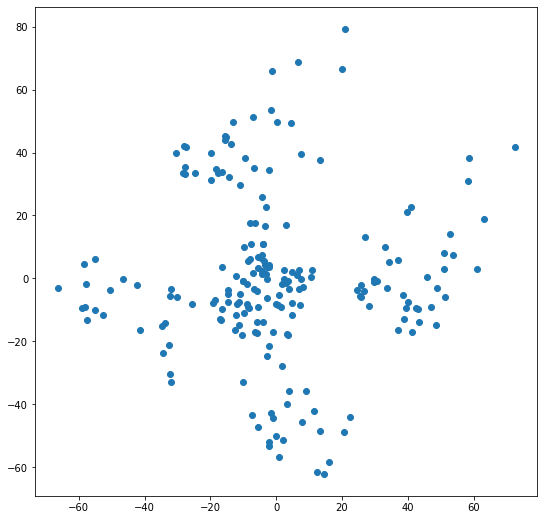

In [6]:
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2']) 

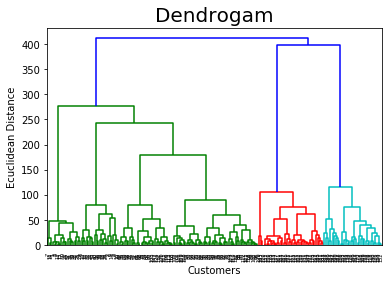

In [7]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df.values, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

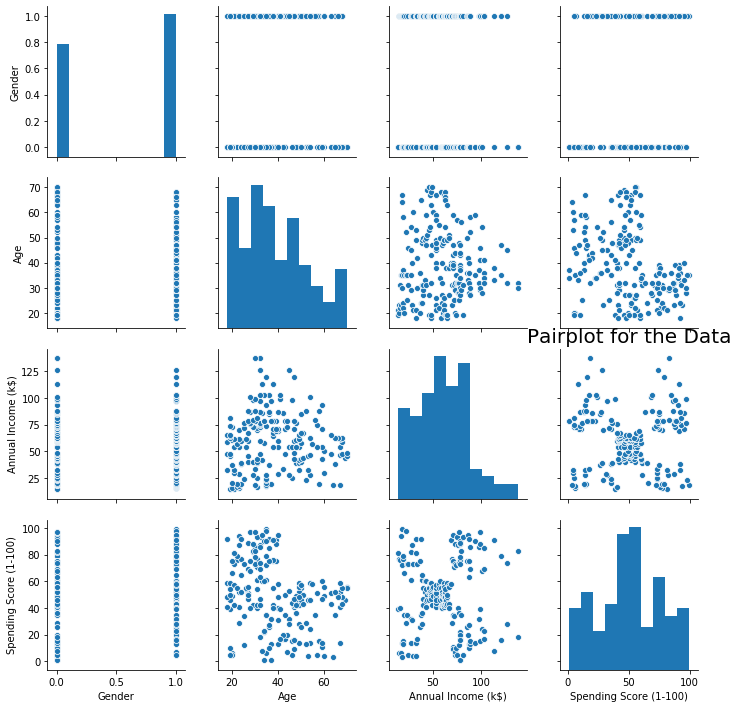

In [8]:
import seaborn as sns
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

# Datos de Cofincafe

In [9]:
df2 =pd.read_csv('2019-06.csv')
df_clean = df2[['AGENCIA','TIPO PRESTAMO','GARANTÍA ADMISIBLE','CALIFICACIÓN ARRASTRE',
                'SALDO APORTES','SALDO CAPITAL','SEXO','EDAD','ESTRATO','ESTADO CIVIL','PERSONAS A CARGO','NIVEL DE ESTUDIOS','TIENE VIVIENDA',
                'DIFERENCIA INGRESOS EGRESOS','CUOTA']]
df_clean = df_clean.dropna()
print(df_clean.shape)
df_clean.head()

(9404, 15)


,AGENCIA,TIPO PRESTAMO,GARANTÍA ADMISIBLE,CALIFICACIÓN ARRASTRE,SALDO APORTES,SALDO CAPITAL,SEXO,EDAD,ESTRATO,ESTADO CIVIL,PERSONAS A CARGO,NIVEL DE ESTUDIOS,TIENE VIVIENDA,DIFERENCIA INGRESOS EGRESOS,CUOTA
0,BUGA,Microcrédito,0.0,A,142017.07,4350000.0,Femenino,61.0,2,Casado,Cero,Primaria,N,1213784,437015.29
1,BUGA,Microcrédito,0.0,A,207522.37,5200000.0,Masculino,28.0,1,Soltero,Cero,Universitario,N,385000,265307.01
2,QUIMBAYA,Microcrédito,0.0,A,49687.00,2100000.0,Femenino,40.0,2,Casado,Tres,Técnico,N,285308,104838.18
3,BUGA,Microcrédito,0.0,A,105189.45,10500000.0,Femenino,55.0,2,Soltero,Cero,Bachillerato,N,1118080,400360.95
4,BUGA,Microcrédito,0.0,A,77901.72,5700000.0,Femenino,59.0,1,Soltero,Cero,Primaria,N,1581750,290817.30


In [10]:
def build_or_load_map(dataf, name):
    mapa = {}
    for i, p in enumerate(dataf[name].value_counts().keys()):
        mapa[p] = i
    if(name in ['ESTADO CIVIL', 'PERSONAS A CARGO', 'NIVEL DE ESTUDIOS', 'OCUPACION', 'TIPO VIVIENDA', 'LUGAR_RESIDENCIA']):
        mapa['NO ESPECIFICA'] = i+1
    return mapa

In [11]:
agencia = build_or_load_map(df_clean,'AGENCIA')
print(agencia)

df_clean = df_clean.replace(agencia)
df_clean = df_clean.replace({'Microcrédito':0,'Consumo':1,'Comercial':2})
df_clean = df_clean.replace({'A':0,'B':1,'C':2,'D':3,'E':4})
df_clean = df_clean.replace({'Femenino':0,'Masculino':1})
estado_c = build_or_load_map(df_clean,'ESTADO CIVIL')
df_clean = df_clean.replace(estado_c)
df_clean = df_clean.replace({'Cero':0,'Una':1,'Dos':2,'Tres':3,'Cuatro':4,'Cuatro o m':5})
n_estudio = build_or_load_map(df_clean,'NIVEL DE ESTUDIOS')
df_clean = df_clean.replace(n_estudio)
df_clean = df_clean.replace({'N':0,'Y':1})



{'ARMENIA': 0, 'TULUA': 1, 'BUGA': 2, 'SANTA ROSA': 3, 'QUIMBAYA': 4, 'PEREIRA': 5, 'FUNDADORES': 6, 'CHINCHINA': 7, 'TEBAIDA': 8, 'MINORISTA': 9, 'SINCELEJO': 10, 'IBAGUE': 11}


In [12]:
print(agencia)
print(estado_c)
print(n_estudio)

{'ARMENIA': 0, 'TULUA': 1, 'BUGA': 2, 'SANTA ROSA': 3, 'QUIMBAYA': 4, 'PEREIRA': 5, 'FUNDADORES': 6, 'CHINCHINA': 7, 'TEBAIDA': 8, 'MINORISTA': 9, 'SINCELEJO': 10, 'IBAGUE': 11}
{'Casado': 0, 'Soltero': 1, 'Union Libre': 2, 'Divorciado': 3, 'Viudo': 4, 'Separación Judicial': 5, 'Ninguno': 6, 'NO ESPECIFICA': 7}
{'Bachillerato': 0, 'Primaria': 1, 'Universitario': 2, 'Técnico': 3, 'Tecnológico': 4, 'Especializacion': 5, 6: 6, 'Otros': 7, 'Maestría': 8, 'Estudiante': 9, 'Doctorado': 10, 'Curso': 11, 'Postdoctorado': 12, 'Diplomado': 13, 'NO ESPECIFICA': 14}


In [13]:
import re
df_clean['DIFERENCIA INGRESOS EGRESOS']
df_clean = df_clean.astype({'DIFERENCIA INGRESOS EGRESOS': 'float64'})
df_clean = df_clean.dropna()
df_clean.dtypes

AGENCIA                          int64
TIPO PRESTAMO                    int64
GARANTÍA ADMISIBLE             float64
CALIFICACIÓN ARRASTRE            int64
SALDO APORTES                  float64
SALDO CAPITAL                  float64
SEXO                             int64
EDAD                           float64
ESTRATO                          int64
ESTADO CIVIL                     int64
PERSONAS A CARGO                 int64
NIVEL DE ESTUDIOS                int64
TIENE VIVIENDA                   int64
DIFERENCIA INGRESOS EGRESOS    float64
CUOTA                          float64
dtype: object

Text(0.5, 1, 'Correlation Factors Heat Map')

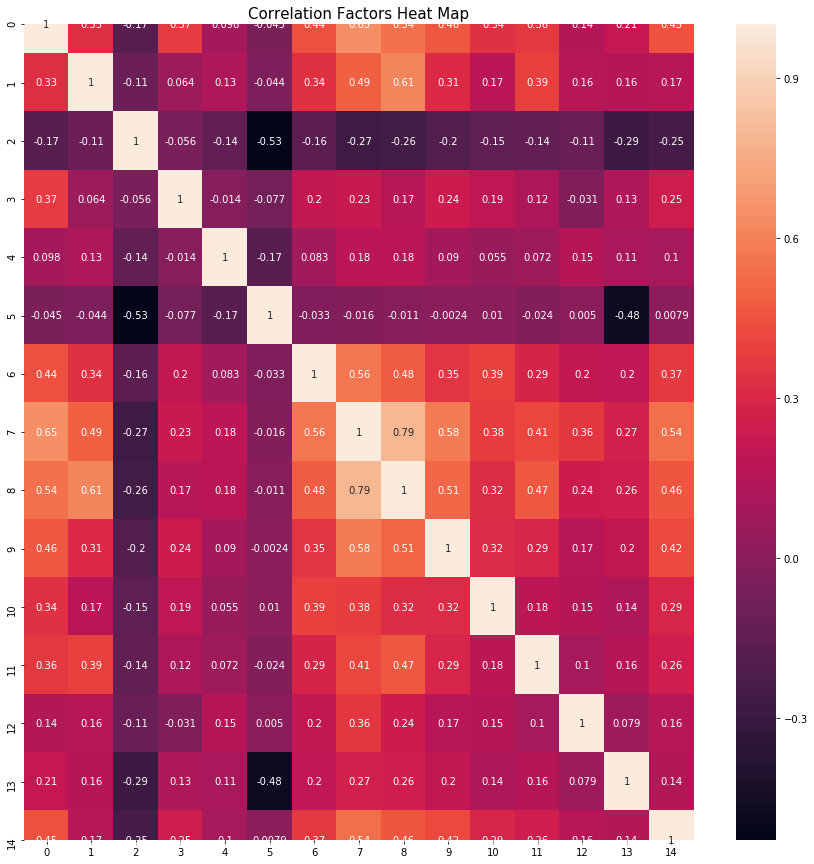

In [14]:
X_norm = normalize(df_clean.values) 
plt.figure(figsize =(15, 15)) 
sns.heatmap(pd.DataFrame(X_norm).corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')

In [15]:
X_norm = normalize(df_clean.values) 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_norm) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0 -0.269405  0.017480
1 -0.367317  0.170486
2 -0.341141  0.124990
3 -0.355061  0.148998
4 -0.272445  0.022059


In [16]:
# from sklearn.decomposition import KernelPCA
# pca2 = KernelPCA(n_components = 2, fit_inverse_transform=True) 
# X_principal = pca2.fit_transform(X_norm) 
# X_principal = pd.DataFrame(X_principal)
# print(X_principal.head()) 

In [17]:
# pca2.X_transformed_fit_

In [18]:
pca.singular_values_

array([35.27543499, 33.00261832])

In [19]:
pca.explained_variance_ratio_

array([0.4655519 , 0.40749299])

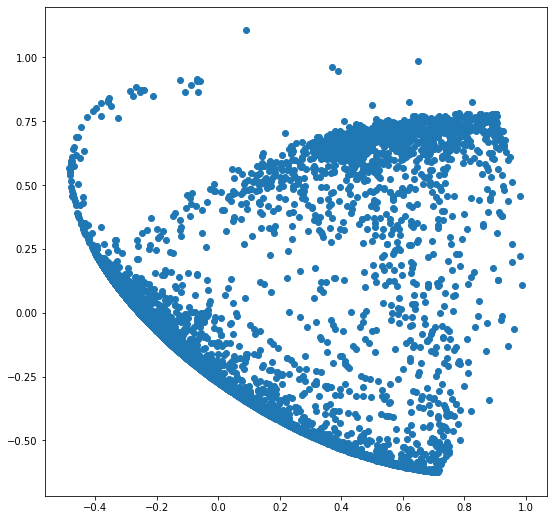

In [20]:
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2']) 

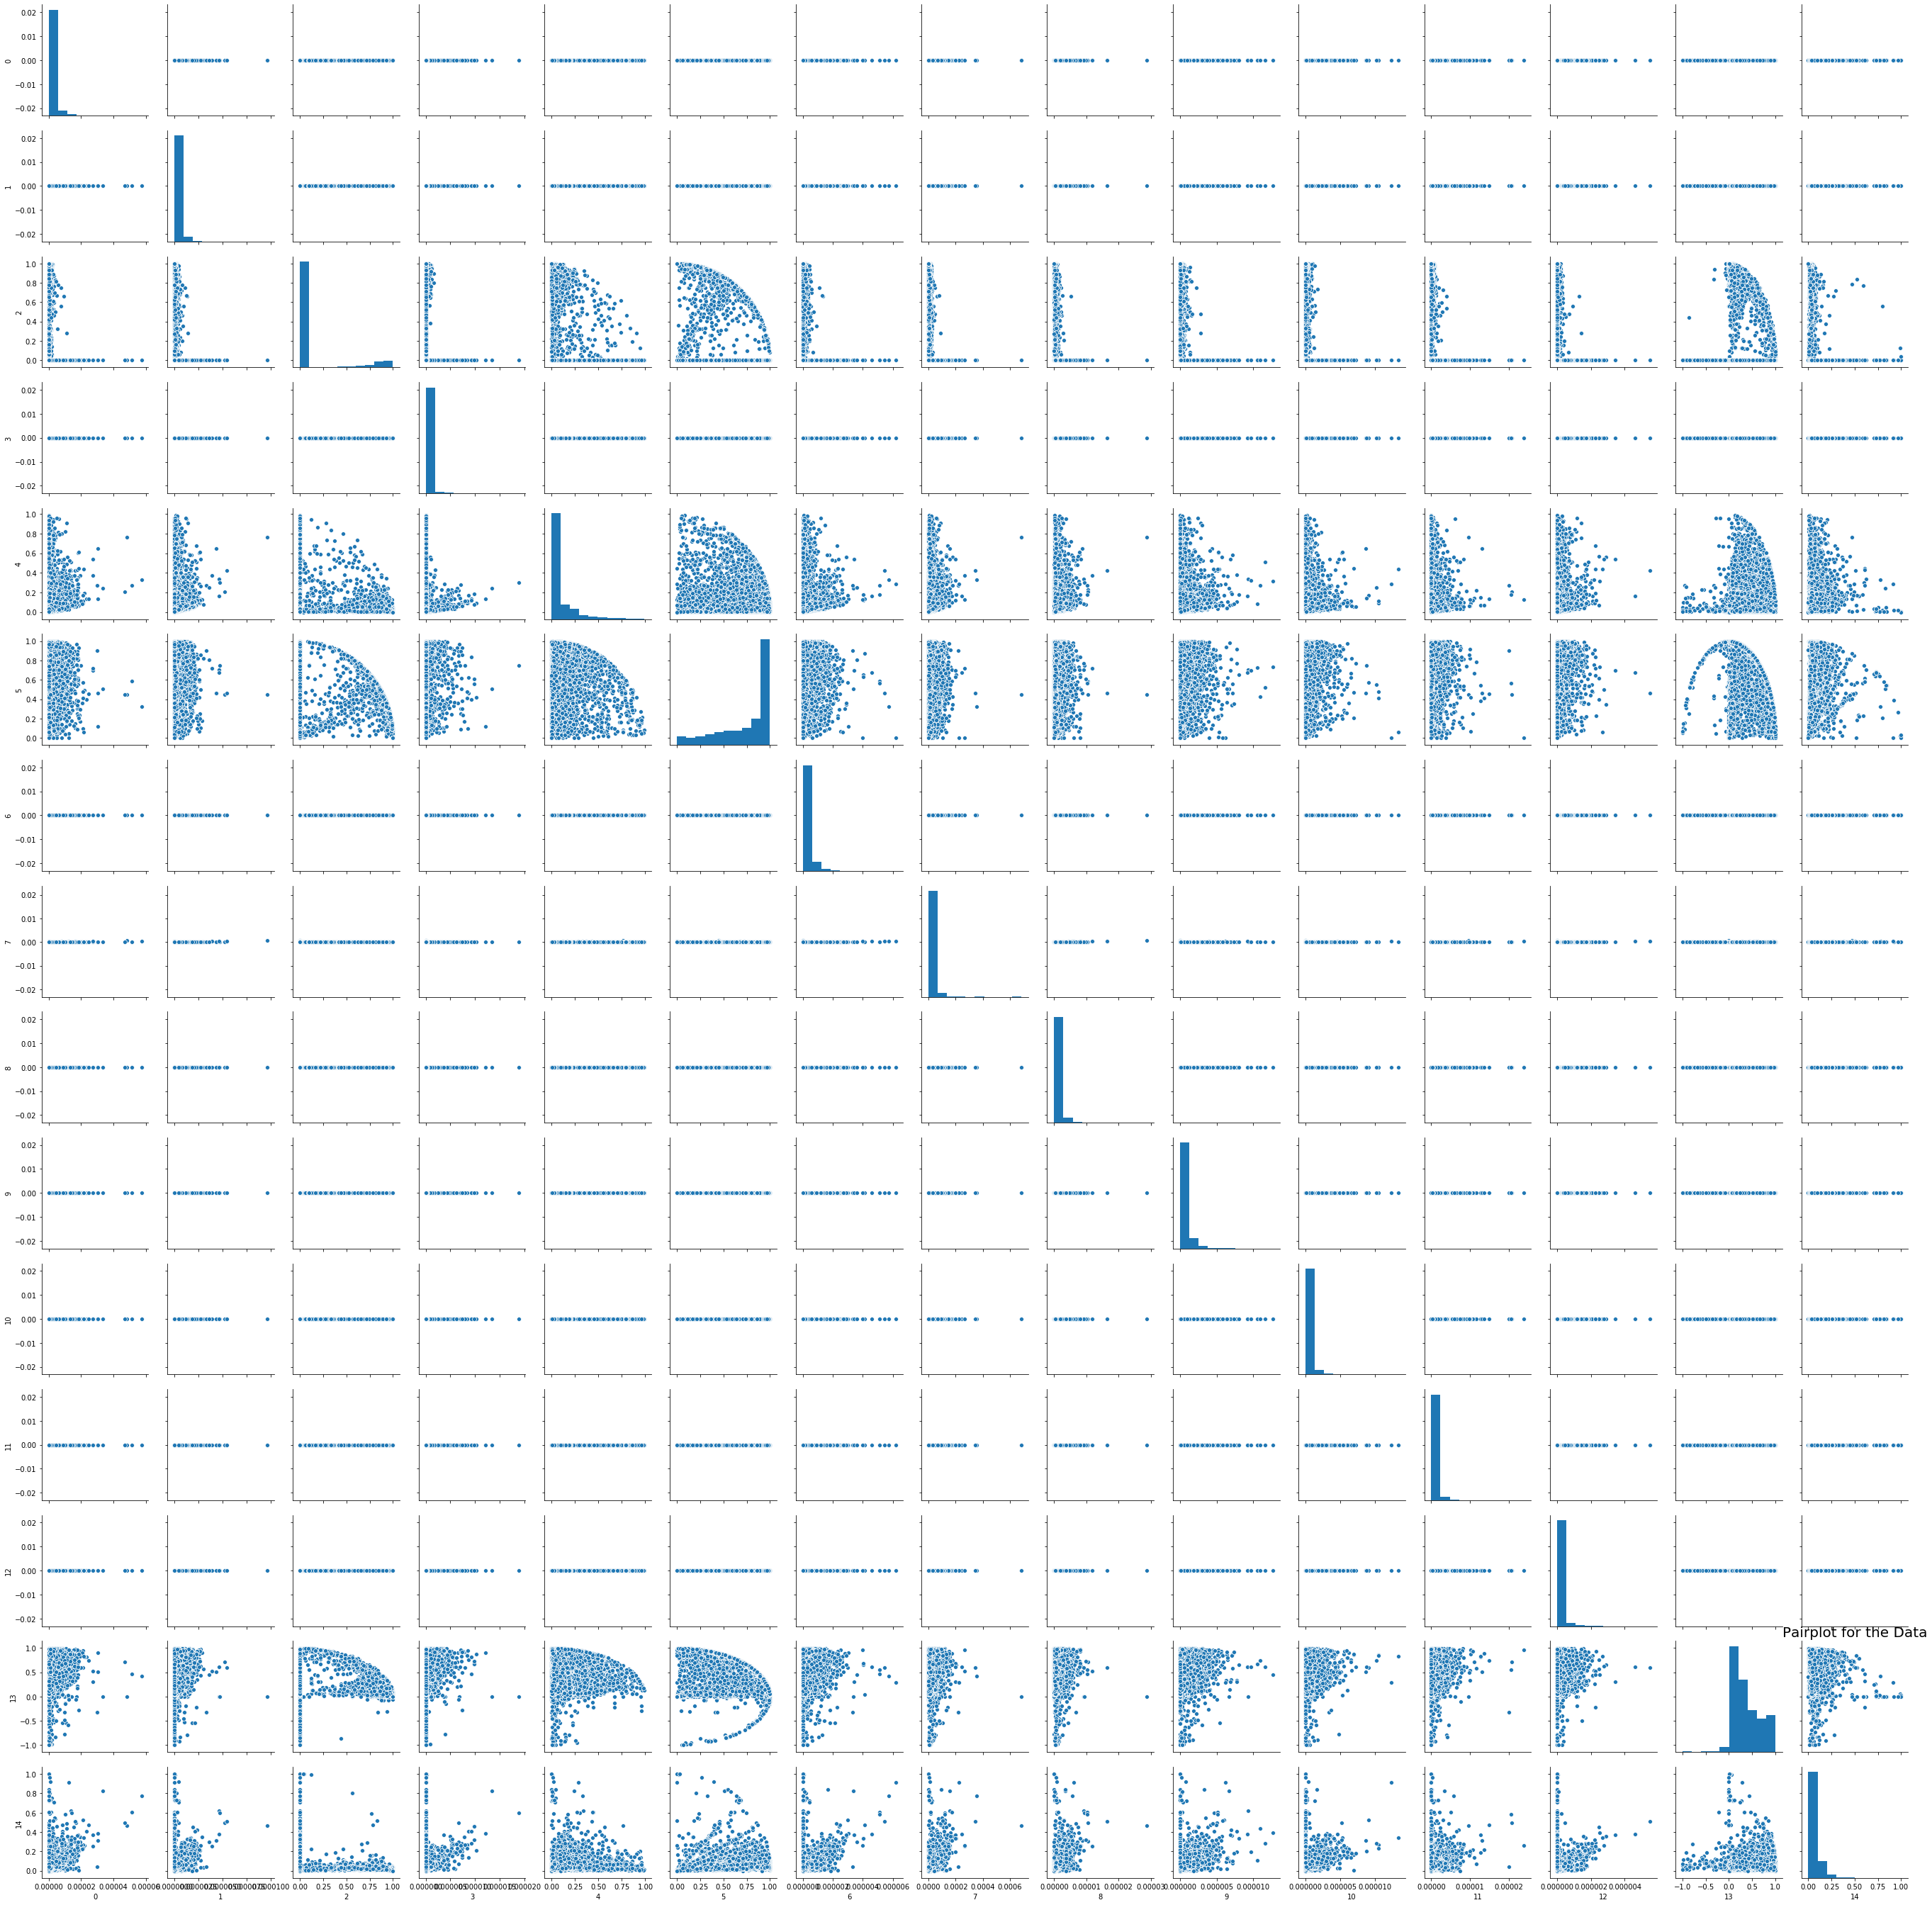

In [21]:
import seaborn as sns
sns.pairplot(pd.DataFrame(X_norm))
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

In [22]:

from sklearn.cluster import DBSCAN 
db_default = DBSCAN(eps = 0.1, min_samples = 40, metric="manhattan").fit(X_principal) 
labels = db_default.labels_ 

In [23]:
from sklearn.cluster import DBSCAN 
db_default2 = DBSCAN(eps = 0.1, min_samples = 40, metric="euclidean").fit(X_principal) 
labels2 = db_default2.labels_ 

In [24]:
'''dicLabels = {}
for i in np.arange(0.001,2,0.001):    
    from sklearn.cluster import DBSCAN 
    db_ejemplo = DBSCAN(eps = i, min_samples = 40, metric="euclidean").fit(X_principal)
    dicLabels[i] = np.amax(db_ejemplo.labels_)


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-24-b44368e70272>, line 5)

In [ ]:
dicLabels

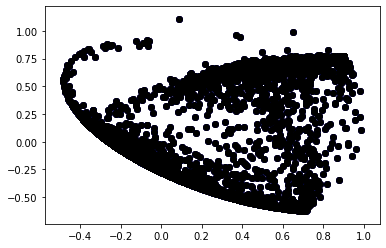

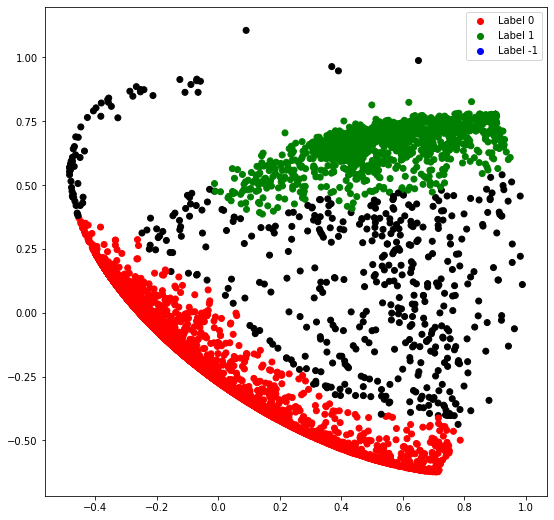

In [25]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'y'
colours[5] = 'm'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label -1')) 
  
plt.show() 

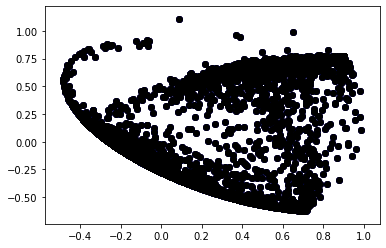

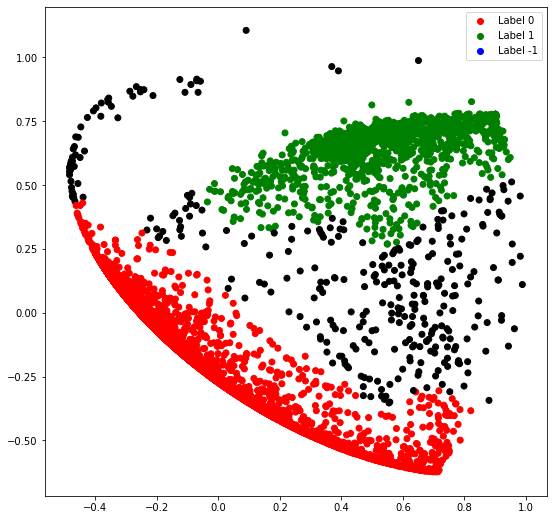

In [26]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'y'
colours[5] = 'm'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels2] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label -1')) 
  
plt.show() 

In [28]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X_principal, labels)

4102.707733416423

In [32]:
#df_clean = df_clean.drop(columns=['etiqueta'])
df_clean.insert(0, 'etiqueta', labels, True)
df_clean.to_csv('datos.csv')